# Applied Statistical Tests

In the previous chapter we introduced descriptive statistics and hypothesis testing.  In this chapter we will make extensive use of the concepts covered to introduce you to:

## A/B Testing

### Inquiry

Suppose you work for a company that makes towels, and they want to send an email, like they've done many times in the past, to see how much this email affects sale of their towels.  Now let's say that, in the past 10 percent of the people sent the email bought a towel.  But, we aren't sure if this email maximizes profits.  In other words, would a different email mean we make more profit?

### Set Up

In order to test this question, we can set up an experiment.  Here we will set up a randomized test group and a randomized control group.  

The test group will be sent an email, with slightly different copy, or possibly with a picture.  Some specific change will be made, in any event.

The control group will get the same email as last time.  This way, we can directly compare, as much as possible between the old email and the new one.  There are many things you typically need to control for, or account for in experimental design.  Some things to account for in this scenario are:


1) Age

2) Gender

3) Race

4) Location

5) Time of Day

6) Time of Year

7) Approximate Disposable Income


By setting up the experiment with a test and control group, we account for time of day and time of year directly.  Some of the other information like location, age, gender, and approximate disposable income; we may not be able to account for.  Some of this may be accounted by selecting randomly from our population.  But there is no guarantee of that.  It is best to account for as many variables of interest as you can, while remaining ethical.  We will cover the ethics of variable accounting in the next section in detail.

### Running Our Example

In order to evaluate our set up, we will assume that our conversion rate follows a Bernoulli random variable.

### Bernoulli Random Variables

a Bernoulli random variable takes on value '1' with probably `p`, and value '0' with probability `1-p`.  

For our case, a value of '1' represents a person who chose to buy a towel by going to the website after reading our email.  The value of '0' represents no towel being bought after reading our email.

Informally, we can think of a Bernoulli random variable as a model for the set of possible outcomes of any single experiment.

Specifically, a Bernoulli random variable takes on value '1' with probably `p`, and value '0' with probability `1-p`.  

For our case, a value of '1' represents a person who chose to buy a towel by going to the website after reading our email.  The value of '0' represents no towel being bought after reading our email.

### An Aside Regarding Assumptions

By setting up our experiment in this way, we have actually assumed quiet a bit.  Let's formally state our assumptions here.  It is good practice, generally speaking to always list out your assumptions and confirm with a domain experiment, someone who knows the problem, but maybe not the statistics, before caring out any experiments.  If you work in a place where tasks are created for you, then before you get started, it's a good idea to confirm with the person who created the task, to make sure you are both aligned on assumptions.

### Making Our Assumptions Explicit

1) We assume here that the only reason a person would buy a towel is because of this email.

This is a pretty strong assumption.  Specifically we are only looking at the marginal effect of changing the language in an email.  It could be the case that our entire control group or our entire test group happened to need a new towel, and this email reminded them.  It could be all of the people in group one or group two just moved, and didn't have _any_ towels.  Or it could be that everyone in a group always buys things due to a sale.  

We could control for some of this stuff, which will be touched upon in a later section.  But for now, we aren't controlling for any of it.  

2) We assume non-uniformity of preferences.

A preference is a propensity or likelihood to consume a product, given the choice to consume it and the ability.  So if you are more likely to consume chocolate ice cream over vanilla ice cream given the choice between the two, and the money to buy either, then we say you have a preference for chocolate ice cream.

By assuming non-uniformity of preferences, we are saying, implicitly that there is some utility function for towels for each individual.  And that at price `towel_price`, you will not buy, because it would cost more than the utility you would derive.  But at price `towel_sale_price`, you will buy, because it would cost less than the utility you would derive.

3) We assume evenly distributed life circumstances.

We assume everyone on this email is capable of buying a towel from us.  This may seem like a riddiculous assumption, but what it's really not.  You have no idea what circumstance someone is in.

4) We assume evenly distributed access to the email

What if everyone who didn't buy a towel deactivated their email, or died, or doesn't speak english, or possibly, that their email client filtered out the email.  If we don't know for sure, we don't know the effectiveness of the email campaign.

The reason it's important to explicitly state your assumptions, is not necessarily for the code itself.  Although it can inform the tests you run or the models you create.  The most important reason to write down your assumptions is for future people working with your code, which is more often than not yourself, as well as for your managers.  


## Simulating Some Data

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy import stats

test_size = 1000
control_size = 1000
test_probability = 0.15
control_probability = 0.1
test_dist = stats.bernoulli(test_probability)
control_dist = stats.bernoulli(control_probability)

Note: we don't actually know the test probability, so "pretend" you can't see it.  We wouldn't know this for the population in the real world.  Also, we probably can't be "sure" our process follows a Bernoulli random variable.  It could be some other generative process, like this:

In [89]:
import random

def generative_process():
    random_number = random.randint(0, 100)
    if random_number < 15:
        return 1
    elif random_number % 2 == 0:
        return 0
    else:
        return 1
    
[generative_process() for _ in range(10)]

[0, 1, 1, 1, 1, 1, 0, 0, 1, 0]

The important difference here is there are multiple cases by which our generative process outputs a '1', which we may be important!  The more you know about your underlying data generation process, the better.  But usually it is impossible to discern this.  The important thing to note is, this is an assumption.

In [4]:
import pandas as pd
import numpy as np

test_df = pd.DataFrame()
test_df["converted"] = test_dist.rvs(size=test_size)
test_df["group"] = "test"
control_df = pd.DataFrame()
control_df["converted"] = control_dist.rvs(size=control_size)
control_df["group"] = "control"
df = test_df.append(control_df)

In [5]:
summary = df.pivot_table(values='converted', index='group', aggfunc=np.sum)
# add additional columns to the pivot table
summary['total'] = df.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
summary['rate'] = df.pivot_table(values='converted', index='group')
summary

converted  total   rate
group                           
control         92   1000  0.092
test           153   1000  0.153

We may believe our test was successful at this point, and in fact, we are done.  However, how do we know that our test was successful?  How do we know that the two samples differences weren't just because of demographic differences?  Time to verify against all of the assumptions we made in the prior section!

In order to do this we will look at the chi-squared test.  Recall, the chi-squared test's null hypothesis states the two variables are independent.  One could also think of the null hypothesis as, "is there a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table".  

This sounds perfect!  So let's bring in our other variables:

* Age
* Gender
* Location
* Race


Note: Here we assume that location is a proxy for income.  So we'll specify location as high, medium and low; where high means an expensive area to live, medium means a middle class area to live, and low means a poor area to live.

Note: We will specify Gender as a binary variable.  While in the real world this assumption is not valid, we will make this simplifying assumption here.

Note: For Race we will specify one of four categories:


* white
* black
* asian
* hispanic


Note: For Race we will specify one of four categories:

While this does not encompass all of the races, it works as a simplifying set of assumptions, for this example.

* 18 - 24
* 24 - 35
* 35 - 50
* 50 - 70
* 70+


Note: For Age we will specify one of five categories:
Now let's generate some data:

In [6]:
import random

def generate_data(df, column, choices):
    """
    Generates categorical data given choices.
    
    Parameters:
    * df - pd.DataFrame: the data to add a column to
    * column - str: the column to generate
    * choices - list: the list of possible choices
    
    Returns:
    A dataframe with the newly generated column.
    """
    df[column] = [random.choice(choices)
                  for _ in range(df.shape[0])]
    df = pd.concat([df, pd.get_dummies(df[column])], axis=1)
    df = df.drop(column, axis=1)
    return df

def generate_contingency_table(df, demographics):
    """
    Generates a contingency table from a list of choices.
    We hard code converted, because that is 'always' one of the variables of interest.
    
    Parameters:
    * df - pd.DataFrame: the dataframe to convert to a contingency table.
    * demographics - list: a list of demographics, aka the classes from
    all categorical classes of interest.
    
    Note: one way to get the demographics is:
    categories = []
    for column in categorical_columns:
        categories += list(df[column].unique())
    """
    summary = df.pivot_table(values='converted', index='group', aggfunc=np.sum)
    for demographic in demographics:
        summary[demographic] = df.pivot_table(
            values=demographic,
            index="group",
            aggfunc=np.sum
        )
    return summary

In [ ]:
gender_choices = ["male", "female"]
age_choices = ["18-24", "24-35", "35-50", "50-70", "70+"]
race_choices = ["white", "black", "asian", "hispanic"]
location_choices = ["high", "medium", "low"]

test_df = generate_data(test_df, "gender", gender_choices)
test_df = generate_data(test_df, "age", age_choices)
test_df = generate_data(test_df, "race", race_choices)
test_df = generate_data(test_df, "location", location_choices)
control_df = generate_data(control_df, "gender", gender_choices)
control_df = generate_data(control_df, "age", age_choices)
control_df = generate_data(control_df, "race", race_choices)
control_df = generate_data(control_df, "location", location_choices)

df = pd.DataFrame()
df = df.append(test_df)
df = df.append(control_df)

# does list concatenation
demographics = gender_choices + age_choices + race_choices + location_choices
table = generate_contingency_table(df, demographics)

Before we run our hypothesis test, let's look at our contingency table!

In [93]:
table

converted   male  female  18-24  24-35  35-50  50-70  70+  white  \
group                                                                       
control        106  500.0   500.0    199    223    194    205  179    249   
test           137  531.0   469.0    205    207    204    187  197    231   

         black  asian  hispanic   high  medium    low  
group                                                  
control  234.0  255.0     262.0  301.0   350.0  349.0  
test     258.0  256.0     255.0  332.0   329.0  339.0

In [7]:
import pandas
from scipy.stats import chi2_contingency

table_transpose = table.T
chi2, pvalue, degrees_of_freedom, expected = chi2_contingency(table_transpose)

chi2, pvalue

(19.04123960342558, 0.16337944030998258)

Let's go over the definitions of each of these:

* chi2 - this is the test statistic.  It is calculated as a normalized sum of squared deviations between observed and theoretical frequencies.  In the two group setting we can take one as the observation and the other as the theoretical.

* p value - this is the probability value of obtaining test results at least as extreme as the results actually observed during the test, assuming the null hypothesis is correct.  So the lower the p value, the more likely we are to reject the null hypothesis.

* degress of freedom - since we are doing the test for homogenity, here the degrees of freedom are:

$$ df = (Rows - 1) * (Columns -1)  $$ 

Where Rows := number of categories, aka the rows of the contingency table.

Where Columns := number of independent groups

Notice, we satisfy this requirement by taking the transpose of the contingency table

* expected value - this is the theoretical values for the contingency table, given the null hypothesis is true.


### Analyzing Our Test

Now let's see what our test tells us about our data.  First let's explicitly state the null hypothesis and alternative hypothesis:

* null hypothesis: there exists no relationship between the two groups.  If the null hypothesis is true, then it might be the case that the difference in our conversion rates is significant.

* alternative hypothesis: there exists a relationship between the two groups.  In other words, the two groups are statistically similar.  If this is the case, then it might be that the difference in our conversion rates is due to chance.

Based on the p-value, it looks like we fail to reject our null hypothesis.  With a test statistic of approximately 12.64, the normalized sum of squared deviations appears large enough that there is no relationship.  This appears to confirm what our contingency table seemed to be telling us.  Let's go a little deeper.

Let's next verify, for academic purposes that the degrees of freedom match up with what we expect:

In [8]:
degrees_of_freedom == (table.shape[0]-1) * (table.shape[1]-1)

True

Now, just for comparison, let's look at the expected values:

In [9]:
pd.DataFrame(expected, columns=table_transpose.columns, index=table_transpose.index).T

converted        male      female       18-24      24-35  \
group                                                                
control  121.593693  489.848878  502.752699  202.490722  201.49812   
test     123.406307  497.151122  510.247301  205.509278  204.50188   

              35-50       50-70         70+       white       black  \
group                                                                 
control  202.987022  195.542511  190.083202  244.676289  244.179988   
test     206.012978  198.457489  192.916798  248.323711  247.820012   

              asian    hispanic        high      medium         low  
group                                                                
control  272.469133  231.276167  316.143602  315.151001  361.306974  
test     276.530867  234.723833  320.856398  319.848999  366.693026

In [10]:
table

converted   male  female  18-24  24-35  35-50  50-70  70+  white  \
group                                                                       
control         92  499.0   501.0    216    202    206    195  181    251   
test           153  488.0   512.0    192    204    203    199  202    242   

         black  asian  hispanic   high  medium    low  
group                                                  
control    250  265.0       234  319.0   311.0  370.0  
test       242  284.0       232  318.0   324.0  358.0

Now let's verify our calculation of test statistic:

In [11]:
summation = 0
expected_df = pd.DataFrame(
    expected, columns=table_transpose.columns, 
    index=table_transpose.index).T
for index, row in table_transpose.iterrows():
    for column in table_transpose.columns:
        deviation = row[column] - expected_df[index][column]
        deviation_squared = deviation ** 2
        normed_deviation_squared = deviation_squared / expected_df[index][column]
        summation += normed_deviation_squared
summation

19.041239603425577

In [13]:
round(summation, 5) == round(chi2, 5)

True

Success!  Now we are sure that we have some belief that our test and control are different, accounting for at least some demographic variables, we are ready to do our final exploration.  

This is an important point - if something passes a hypothesis test (or fails) that does not mean that the test is conclusive.  That's why I used the word may.  When you do statistics, machine learning, data science or whatever we are calling it these days, you should build up evidence that you believe your hypothesis is true.  You should imagine perhaps a court room, or some other sort of collection of people, that you have to convince of your results.  

Each piece of evidence you bring to the table helps you make your case, but it does not and likely will not lead to a conclusive pattern.  It can only give you more of a chance that your hypothesis is right or wrong.  This is in direct conflict with the business world, where everything usually moves pretty fast.  But, if you build up the right tooling and can replicate the scientific process quickly, you can usually at least develop some confidence in what you are seeing.

With this in mind we move onto the next leg in our scientific journey, data visualization.



## Visualizing Categorical Data


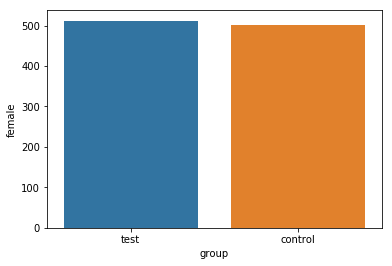

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_data = pd.DataFrame()
gender_data = gender_data.append({
    "female": df[df["group"] == "test"]["female"].sum(),
    "group": "test"
}, ignore_index=True)
gender_data = gender_data.append({
    "female": df[df["group"] == "control"]["female"].sum(),
    "group": "control"
}, ignore_index=True)

sns.barplot(x="group", y="female", data=gender_data)
plt.show()

As you can see it looks like there is a pretty close to even gender split between test and control, so we can probably rule out that lone interaction as the source of our variance.

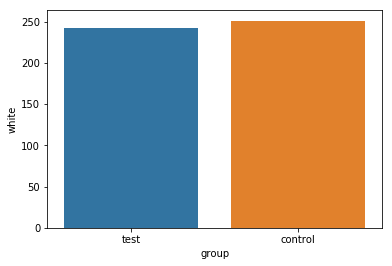

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ethnicity_data = pd.DataFrame()
ethnicity_data = ethnicity_data.append({
    "white": df[df["group"] == "test"]["white"].sum(),
    "group": "test"
}, ignore_index=True)
ethnicity_data = ethnicity_data.append({
    "white": df[df["group"] == "control"]["white"].sum(),
    "group": "control"
}, ignore_index=True)
ethnicity_data = ethnicity_data.append({
    "black": df[df["group"] == "control"]["black"].sum(),
    "group": "control"
}, ignore_index=True)
ethnicity_data = ethnicity_data.append({
    "black": df[df["group"] == "test"]["black"].sum(),
    "group": "test"
}, ignore_index=True)
ethnicity_data = ethnicity_data.append({
    "asian": df[df["group"] == "control"]["asian"].sum(),
    "group": "control"
}, ignore_index=True)
ethnicity_data = ethnicity_data.append({
    "asian": df[df["group"] == "test"]["asian"].sum(),
    "group": "test"
}, ignore_index=True)
ethnicity_data = ethnicity_data.append({
    "hispanic": df[df["group"] == "control"]["hispanic"].sum(),
    "group": "control"
}, ignore_index=True)
ethnicity_data = ethnicity_data.append({
    "hispanic": df[df["group"] == "test"]["hispanic"].sum(),
    "group": "test"
}, ignore_index=True)

sns.barplot(x="group", y="white", data=ethnicity_data)
plt.show()

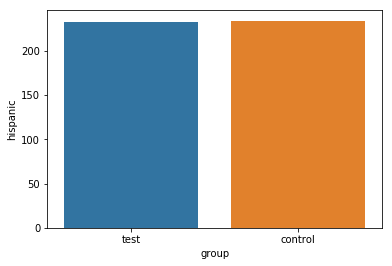

In [19]:
sns.barplot(x="group", y="hispanic", data=ethnicity_data)
plt.show()

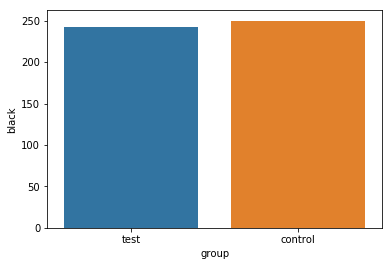

In [20]:
sns.barplot(x="group", y="black", data=ethnicity_data)
plt.show()

The three groups:
* white
* black
* hispanic 

all appear to have very little variation.  However, as we can see below, the difference in size between black folks from test and control appears to be different.  

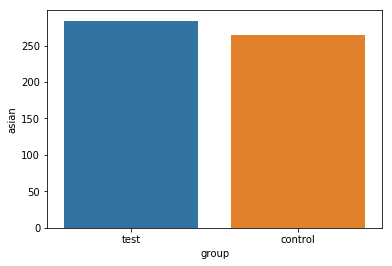

In [18]:
sns.barplot(x="group", y="asian", data=ethnicity_data)
plt.show()

It's worth it to note that because this data was entirely randomly generated, there is no implicit data generation process to analyze, but if this were the real world, I would say this information warrants further inquiry.  In fact, if this were the real world, it may be enough evidence to explain the variation in the difference between test and control.  We will look at how we would measure that next.  But do keep in mind, we may not find anything in this case because the data was randomly generated.  And in fact, any conclusions we do draw will be entirely by chance.



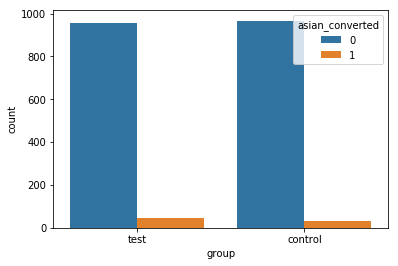

In [29]:
is_asian = df["asian"].astype(bool)
is_asian = is_asian.map({True: 1, False: 0})

is_black = df["black"].astype(bool)
is_black = is_black.map({True: 1, False: 0})

is_white = df["white"].astype(bool)
is_white = is_white.map({True: 1, False: 0})

is_hispanic = df["hispanic"].astype(bool)
is_hispanic = is_hispanic.map({True: 1, False: 0})

converted = df["converted"].astype(bool)
converted = converted.map({True: 1, False: 0})

df["asian_converted"] = is_asian & converted
df["black_converted"] = is_black & converted
df["white_converted"] = is_white & converted
df["hispanic_converted"] = is_hispanic & converted
sns.countplot(x="group", hue="asian_converted", data=df)

As we see from the above graph the chance of either test or control converting is quiet low.  Since the demographic condition is a prior piece of information we can treat the above graph as:

$$ P(Converted | Asian) $$

However, recall that this would only be true in the real world.  Let's compare this to the other groups:

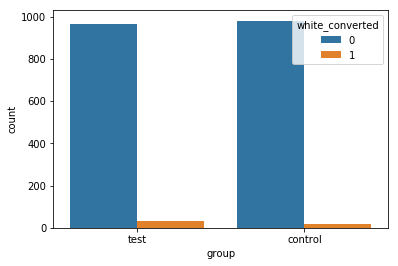

In [31]:
sns.countplot(x="group", hue="white_converted", data=df)

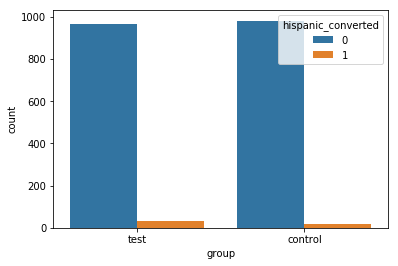

In [32]:
sns.countplot(x="group", hue="hispanic_converted", data=df)

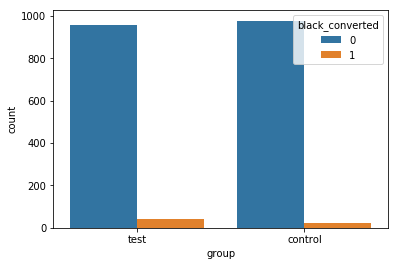

In [33]:
sns.countplot(x="group", hue="black_converted", data=df)

From these graphs it looks like all of the proportions are the same.  Next let's look at the raw counts and percentages to get a better sense of this.

In [38]:
print("Prob(Converted | Asian) =", df["asian_converted"].sum()/len(df))
print("Prob(Converted | White) =", df["white_converted"].sum()/len(df))
print("Prob(Converted | Black) =",df["black_converted"].sum()/len(df))
print("Prob(Converted | Hispanic) =", df["hispanic_converted"].sum()/len(df))

Prob(Converted | Asian) = 0.0385
Prob(Converted | White) = 0.026
Prob(Converted | Black) = 0.032
Prob(Converted | Hispanic) = 0.026


As you can see, the probabilities confirm that the probability of converting is higher assuming the person is Asian.  Just to be sure, let's rerun the test with Asian removed to ensure there is actually a difference between test and control across all demographics.  It could be the case that the difference is being driven just by Asian people who viewed the advertisement, in which case we could only segment the change by this demographic to capture all the gains.

In [41]:
demographics_no_asians = demographics[:]
demographics_no_asians.remove("asian")
table = generate_contingency_table(df, demographics_no_asians)
table_transpose = table.T
chi2, pvalue, degrees_of_freedom, expected = chi2_contingency(table_transpose)

chi2, pvalue

(18.605286113439544, 0.13585945130256297)

It seems as though the p value has fallen but it is still above the 95% confidence interval so we fail to reject the null hypothesis.  Let's look at the contingency table just to verify this:

In [42]:
table

converted   male  female  18-24  24-35  35-50  50-70  70+  white  \
group                                                                       
control         92  499.0   501.0    216    202    206    195  181    251   
test           153  488.0   512.0    192    204    203    199  202    242   

         black  hispanic   high  medium    low  
group                                           
control    250       234  319.0   311.0  370.0  
test       242       232  318.0   324.0  358.0

Clearly the control converted is far below test, even without the asians who have the highest conversion rate.  Therefore this campaign definitely would improve from the change.  Of course, in the real world at least a few more evaluations should occur using the above analysis on some validation sets before you can or should conclude anything.  But this should give you some confidence that this change might be a good one!

## Dealing With Continuous Data

So far we've assumed that our data was entirely categorical.  But what if our scenario was changed slightly.  First, let's talk about what is the same:

* We have a test and control group, representing the change to an email for a sale
* We still have information about our potential customers

The difference is going to be the kind of information we have.  Specifically this time we'll have the following variables:

* Age - as an integer
* Salary

Now let's go ahead and generate our data:

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

test_size = 1000
control_size = 1000
test_probability = 0.15
control_probability = 0.1
test_dist = stats.bernoulli(test_probability)
control_dist = stats.bernoulli(control_probability)

test_df = pd.DataFrame()
test_df["converted"] = test_dist.rvs(size=test_size)
test_df["group"] = "test"
control_df = pd.DataFrame()
control_df["converted"] = control_dist.rvs(size=control_size)
control_df["group"] = "control"
df = test_df.append(control_df)
df["Age"] = np.random.normal(50, 25, size=len(df))
df["Age"] = df["Age"].astype(int)
df["Salary"] = np.random.normal(75000, 15000, size=len(df))
df["Salary"] = df["Salary"].apply(lambda x: round(x, 2))

test= df[df["group"] == "test"]
control = df[df["group"] == "control"]

In [5]:
test.head()

converted group  Age    Salary
0          0  test   66  66084.42
1          1  test   40  65270.42
2          1  test   15  84882.97
3          1  test   70  85411.60
4          0  test   51  76544.84

Notice that we convert `Age` to only include the years, that `Salary` is rounded to two decimal places and that both of these variables are normally distributed.  

Notice also, that we assume that our population of `Age` and `Salary` is homogenous.  This means, that both of our samples must come from the same population of people.  It may be the case that in fact different shape parameters capture the distribution of those who choose to convert or those who choose not to.  We will model that explicitly next!  But first, let's carry out our hypothesis test!

For this set up, we'll make use of the one-way ANOVA test, via the F-test.  Before we carry out the test, let's just check to see if there is a difference in the percentage of those who converted in test and in control:

In [9]:
test["converted"].value_counts()/len(test)

0    0.845
1    0.155
Name: converted, dtype: float64

In [10]:
control["converted"].value_counts()/len(control)

0    0.885
1    0.115
Name: converted, dtype: float64

Looks like there is some difference, with test converting at 15% whereas control converts with 11%.  Let's see if Age can help us to explain this difference with an F-test!

In [7]:
from scipy import stats

test_converted = test[test["converted"] == 1]
control_converted = control[control["converted"] == 1]
stats.f_oneway(test_converted["Age"], control_converted["Age"])

F_onewayResult(statistic=0.4133544105058655, pvalue=0.5208215094686701)

Recall the null and alternative hypotheses for ANOVA:

* Null Hypothesis: the two samples have the same population mean
* Alternative Hypothesis: the two samples have different population mean's and are therefore different.

Going through the set up:

First we look at those in the test and control set that converted.  We want to know if Age is a factor as to why they may have converted.  Because the p value is 0.5, we are far above most thresholds.  So we fail to reject the null hypothesis.  Therefore, Age is not a factor as to whether or not someone converted and bought something due to the change in language in the email.

Going a bit deeper into the set up:

The reason we first segregated our data into those who converted, is because that is our dependent variable.  We are explicitly trying to understand who converted and why.  Since we don't explicitly control for age, we take it as our independent variable and therefore it is what we run our analysis over.  Since we don't control for it explicitly, we want to know if it makes a difference.

Next let's look at Salary to see if this affects anything:

In [11]:
from scipy import stats

test_converted = test[test["converted"] == 1]
control_converted = control[control["converted"] == 1]
stats.f_oneway(test_converted["Salary"], control_converted["Salary"])

F_onewayResult(statistic=0.13355076287967246, pvalue=0.7150667844356584)

Here we even more strongly fail to reject the null hypothesis, therefore Salary doesn't effect whether someone converted or not.  

All of this makes sense because our data came from the same population for both Age and Salary.  Now, let's try regenerating our data, except let's assume that our salary ranges will be different!

In [14]:
test= df[df["group"] == "test"]
control = df[df["group"] == "control"]

test_salary_mean = 150000
test_salary_variance = 30000 

control_salary_mean = 55000
control_salary_variance = 2000

test["Age"] = np.random.normal(50, 25, size=len(test))
test["Age"] = test["Age"].astype(int)
test["Salary"] = np.random.normal(test_salary_mean, test_salary_variance, size=len(test))
test["Salary"] = test["Salary"].apply(lambda x: round(x, 2))

control["Age"] = np.random.normal(50, 25, size=len(control))
control["Age"] = control["Age"].astype(int)
control["Salary"] = np.random.normal(control_salary_mean, control_salary_variance, size=len(control))
control["Salary"] = control["Salary"].apply(lambda x: round(x, 2))

Notice that we've made a very big shift in test and control salary, but kept Age the same.  Let's see how this effects our hypothesis tests!  First let's look at Age:

In [15]:
from scipy import stats

test_converted = test[test["converted"] == 1]
control_converted = control[control["converted"] == 1]
stats.f_oneway(test_converted["Age"], control_converted["Age"])

F_onewayResult(statistic=1.6348240431702024, pvalue=0.20214323774160542)

Here again we fail to reject the null hypothesis, because our shape parameters didn't change.  Therefore both distributions should be from the same population.  Now let's look at salary:

In [16]:
from scipy import stats

test_converted = test[test["converted"] == 1]
control_converted = control[control["converted"] == 1]
stats.f_oneway(test_converted["Salary"], control_converted["Salary"])

F_onewayResult(statistic=1043.8123596703554, pvalue=2.0508424416521246e-94)

As you can see, now we strongly reject the null hypothesis, so clearly Salary has an effect!  This is probably pretty close to the how the real world works - one's salary will determine how likely they are to buy something.  Since the `Salary` in general was higher for those in the test set, it makes way more sense they will convert and purchase something.  This means that in this case, we can conclude that our change to the email was effective at all.  Therefore, we should explicitly control for `Salary` in future experiments.

How can we do that?  

One strategy is by explicitly forcing some of those in the higher salary category and some of those in the lower salary category into each group.  Then we can use statistical matching to the balance the dataset to ensure high wage earners and low wage earners are both represented.